<h1>작업형 문제1 답안</h1>

In [66]:
import csv

f = open('subwayfee_08.csv')
data = csv.reader(f)

header = next(data)

rate = 0
max_rate = 0

station = []
for row in data:
    for i in range(4, 8):
        row[i] = int(row[i].replace(',', ''))
  
    if (row[6] != 0) and (row[4] + row[6] > 100000):
        rate = row[4] / (row[4] + row[6])
        if rate > max_rate:
            max_rate = rate
            station = row
            
f.close()
print('<유임 승차 비율이 가장 높은 역 정보>')
print('역 이름:', station[3])
print('호선명:', station[1])
print('유임 승차 비율 = 유임승차 인원수 / (유임승차 인원수 + 무임승차 인원수)')
print(round(max_rate, 2), '=', station[4], '/ (', station[4], '+', station[6], ')')

<유임 승차 비율이 가장 높은 역 정보>
역 이름: 홍대입구
호선명: 공항철도 1호선
유임 승차 비율 = 유임승차 인원수 / (유임승차 인원수 + 무임승차 인원수)
0.95 = 334381 / ( 334381 + 17164 )


<h1>작업형 문제2 답안</h1>

In [70]:
import csv

f = open('subwayfee_08.csv')
data = csv.reader(f)

header = next(data)

max_people = [0] * 4
max_station = [0] * 4
label = ['(유임승차)', '(유임하차)', '(무임승차)', '(무임하차)']

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i].replace(',', ''))
  
        if row[i] > max_people[i-4]:
            max_people[i-4] = row[i]
            max_station[i-4] = row[3] + ' ' + row[1]

f.close()
for i in range(4):
    print(label[i] + ' ' + max_station[i] + ':', max_people[i], '명')

(유임승차) 강남 2호선: 2073808 명
(유임하차) 강남 2호선: 2018576 명
(무임승차) 종로3가 1호선: 277589 명
(무임하차) 제기동 1호선: 282283 명


<h1>작업형 문제3 답안</h1>

찾고 싶은 지하철역의 이름을 입력하세요: 신도림
찾고 싶은 지하철역의 호선명을 입력하세요: 2호선


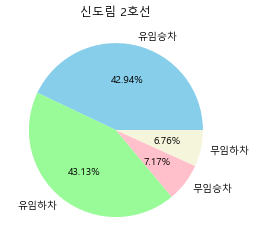

In [1]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee_08.csv')
data = csv.reader(f)

header = next(data)

name = input('찾고 싶은 지하철역의 이름을 입력하세요: ')
line_num = input('찾고 싶은 지하철역의 호선명을 입력하세요: ')

result = []
for row in data:
    if (name in row[3]) and (line_num in row[1]):
        for i in range(4, 8):
            result.append(int(row[i].replace(',', '')))
        
        break

f.close()

label = ['유임승차', '유임하차', '무임승차', '무임하차']
color = ['skyblue', 'palegreen', 'pink', 'beige']

plt.rc('font', family='Malgun Gothic')
plt.title(name + ' ' + line_num)
plt.pie(result, labels=label, colors=color, autopct='%.2f%%')
plt.savefig(row[3] + ' ' + row[1] + '.png')
plt.show()

<h1>작업형 문제4 답안</h1>

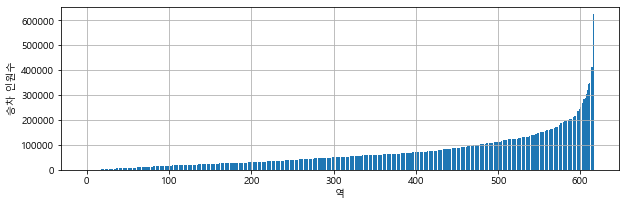

In [2]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime_08.csv')
data = csv.reader(f)

header = next(data)
next(data)

result = []
for row in data:
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
    
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))

f.close()

result.sort()

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 3))
plt.bar(range(len(result)), result)
plt.xlabel('역')
plt.ylabel('승차 인원수')
plt.grid(True)
plt.show()

<h1>작업형 문제5 답안</h1>

In [3]:
import csv

f = open('subwaytime_08.csv')
data = csv.reader(f)

header = next(data)
next(data)

max_people = [0, 0]
max_station = ['', '']
for row in data:
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
    
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > max_people[0]:
        max_people[0] = sum(row[10:15:2])
        max_station[0] = row[3] + '(' + row[1] + ')'
    if sum(row[11:16:2]) > max_people[1]:
        max_people[1] = sum(row[11:16:2])
        max_station[1] = row[3] + '(' + row[1] + ')'

f.close()

print('승차 인원이 최대인 역:', max_station[0] + ',', max_people[0], '명')
print('하차 인원이 최대인 역:', max_station[1] + ',', max_people[1], '명')

승차 인원이 최대인 역: 신림(2호선), 624717 명
하차 인원이 최대인 역: 역삼(2호선), 802638 명


<h1>보너스 문제1 답안</h1>

In [21]:
import csv

f = open('subwaytime_08.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)
next(data)

max_people = 0
max_station = ''
t = int(input('몇 시의 승차 인원이 가장 많은 역이 궁금하세요?: '))

for row in data:
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
    
    row[4:] = map(int, row[4:])
    people = row[2 * t - 4]
    if people > max_people:
        max_people = people
        max_station = row[3] + '(' + row[1] + ')'
    
f.close()

print(max_station + ':', max_people, '명')

몇 시의 승차 인원이 가장 많은 역이 궁금하세요?: 5
신림(2호선): 38345 명


<h1>보너스 문제2 답안</h1>

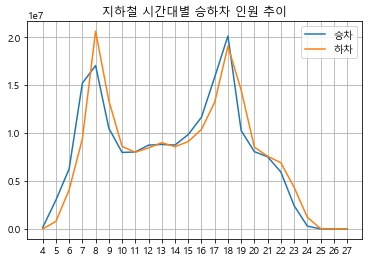

In [27]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime_08.csv')
data = csv.reader(f)

header = next(data)
next(data)

s_in = [0] * 24      # 승차 인원을 저장할 리스트 초기화
s_out = [0] * 24     # 하차 인원을 저장할 리스트 초기화

for row in data:
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
        
    row[4:] = map(int, row[4:])
    for i in range(24):
        s_in[i] = s_in[i] + row[2 * i + 4]
        s_out[i] = s_out[i] + row[2 * i + 5]

f.close()

plt.rc('font', family='Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
plt.legend()
plt.grid(True)
plt.xticks(range(24), range(4, 28))
plt.show()